# ***Chargement des données***


In [1]:
import pandas as pd
df = pd.read_csv('german_credit_data.csv')

In [2]:
df.shape

(1000, 11)

.

.

# ***Analyse Exploratoire des Données***

In [3]:
df.head().style.background_gradient('Reds')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,nan,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,nan,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.tail().style.background_gradient('Reds')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,nan,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,nan,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe().style.background_gradient('Reds')

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
df=df.drop(columns=["Unnamed: 0"])

In [8]:
print("le nombre de valeur unique dans chaque classe\n\n")

for i in list(df.columns):
 print("{} -- {}".format(i, len(df[i].unique())))


le nombre de valeur unique dans chaque classe


Age -- 53
Sex -- 2
Job -- 4
Housing -- 3
Saving accounts -- 5
Checking account -- 4
Credit amount -- 921
Duration -- 33
Purpose -- 8
Risk -- 2


In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())
        print("-----------------------------\n\n\n")

Sex
male      690
female    310
Name: count, dtype: int64
-----------------------------



Housing
own     713
rent    179
free    108
Name: count, dtype: int64
-----------------------------



Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
-----------------------------



Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64
-----------------------------



Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
-----------------------------



Risk
good    700
bad     300
Name: count, dtype: int64
-----------------------------





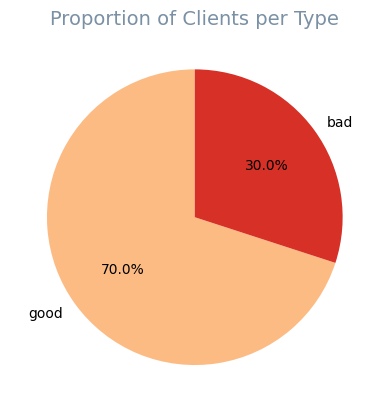

In [10]:
import matplotlib.pyplot as plt


colors = ['#FDBB84', '#D73027']

risk = df["Risk"].value_counts(sort=True)
risk.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#FDBB84', '#D73027'])

plt.title("Proportion of Clients per Type", color="#7A90A4", fontsize=14)
plt.ylabel("")
plt.show()

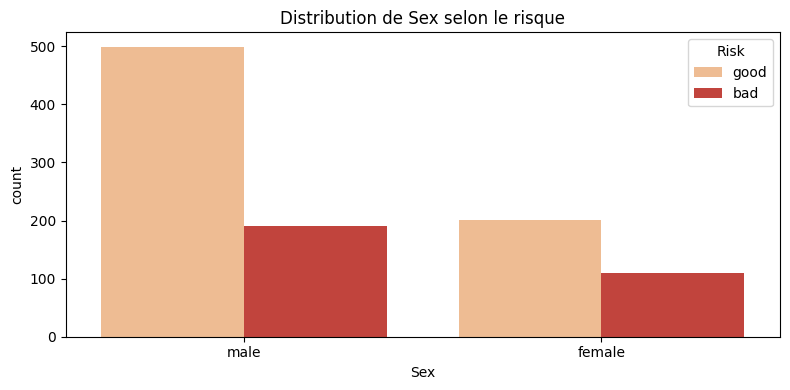

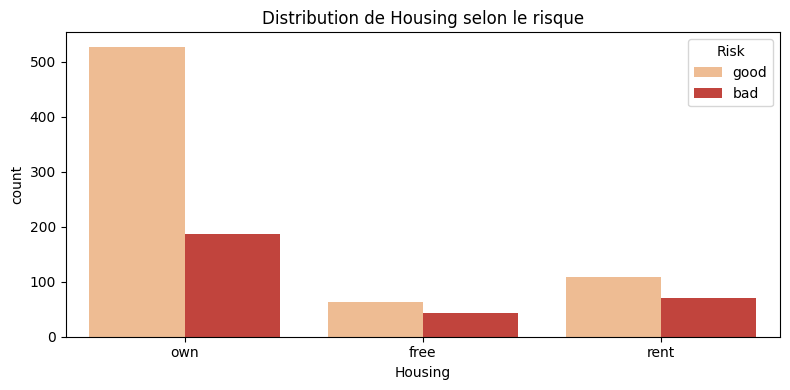

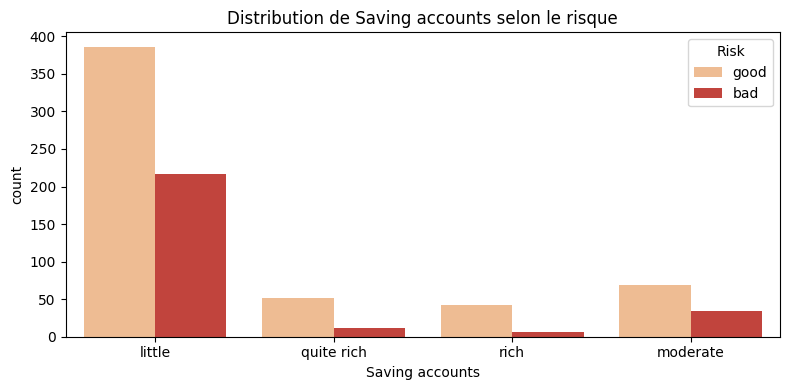

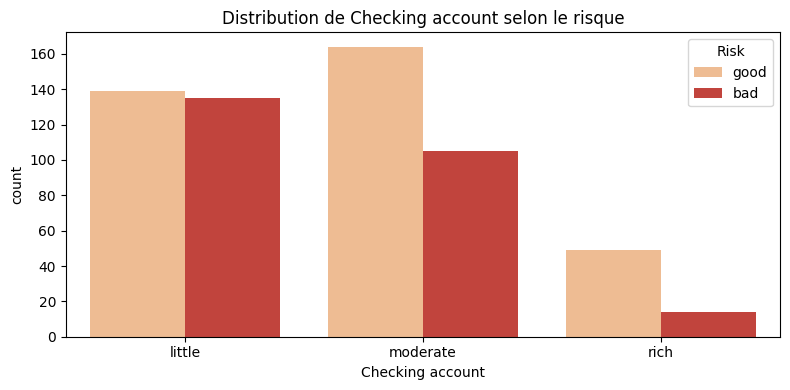

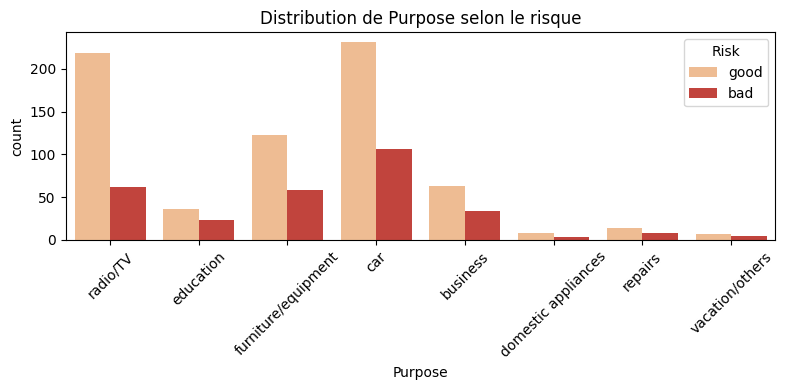

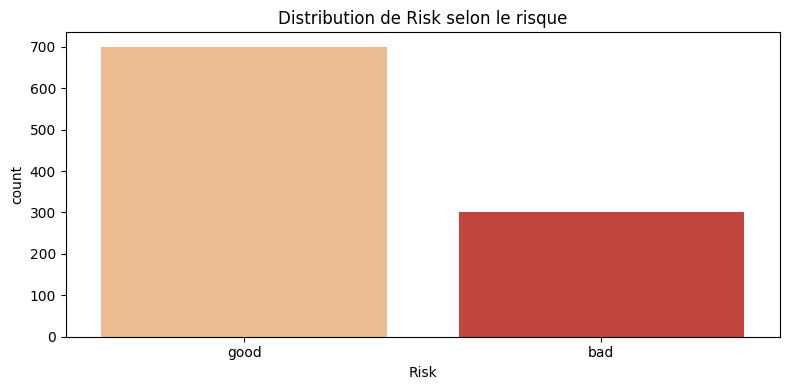

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


cat_columns = df.select_dtypes(include='object').columns.tolist()


for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, hue="Risk", palette=['#FDBB84', '#D73027'])

    plt.title(f'Distribution de {col} selon le risque')
    if col == "Purpose":
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


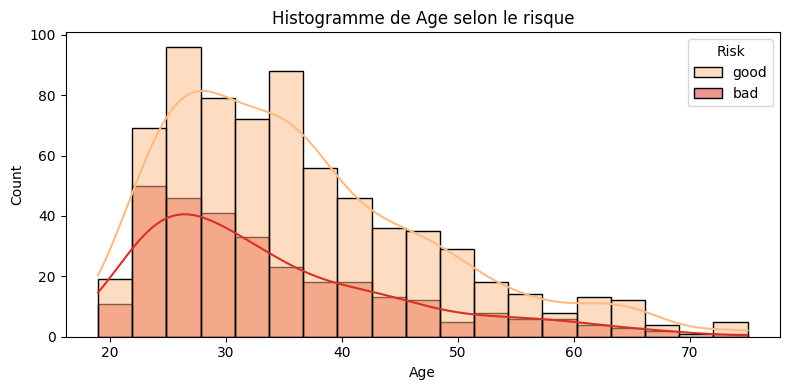

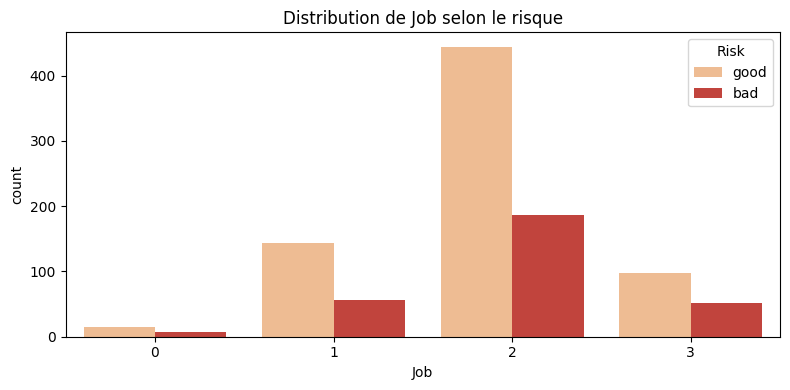

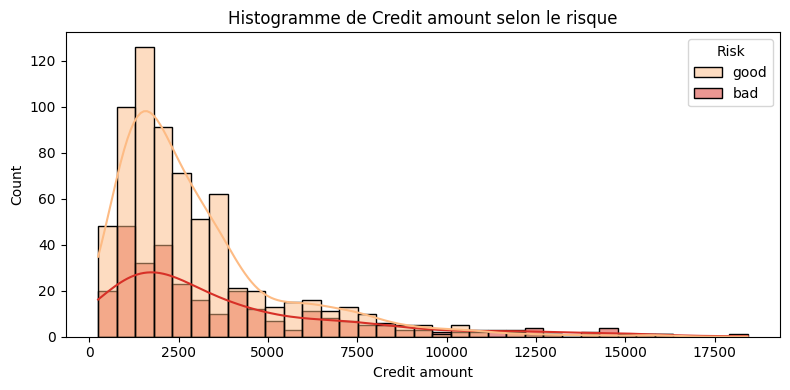

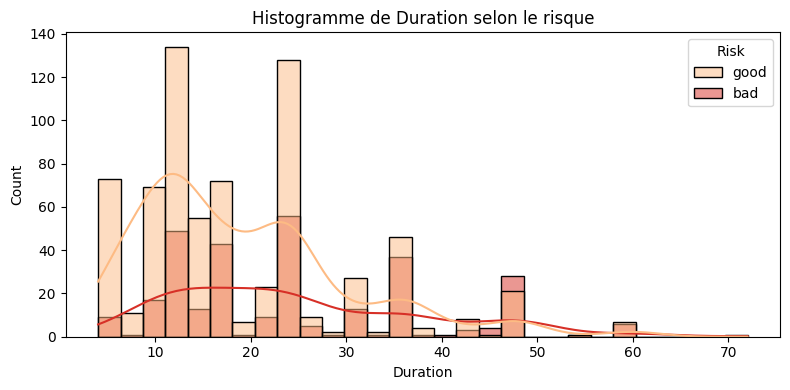

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_columns = df.select_dtypes(exclude="object").columns.tolist()


for col in num_columns:
    plt.figure(figsize=(8, 4))

    if len(df[col].unique()) < 10:
        sns.countplot(x=col, data=df, hue="Risk", palette=['#FDBB84', '#D73027'])
        plt.title(f'Distribution de {col} selon le risque')

    else:
        sns.histplot(x=col, data=df, hue="Risk", palette=['#FDBB84', '#D73027'], kde=True)
        plt.title(f'Histogramme de {col} selon le risque')

    plt.tight_layout()
    plt.show()


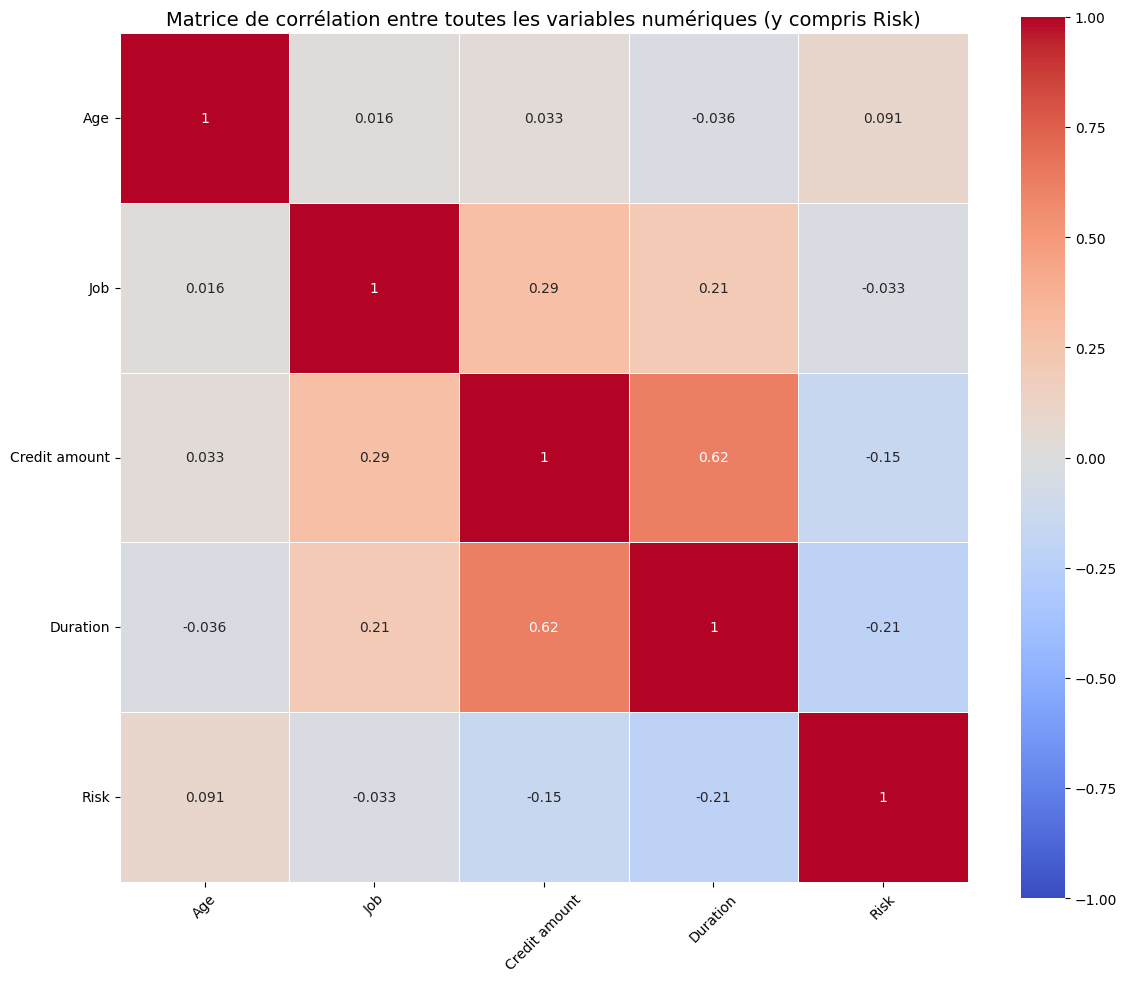

In [13]:
df['Risk'] = df['Risk'].apply(lambda x: 1 if x == 'good' else 0)

num_columns = df.select_dtypes(exclude='object').columns.tolist()


corr_matrix = df[num_columns].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

plt.title("Matrice de corrélation entre toutes les variables numériques (y compris Risk)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# ***Nettoyage des Données***

In [14]:
df['Risk'].isna().sum()

0

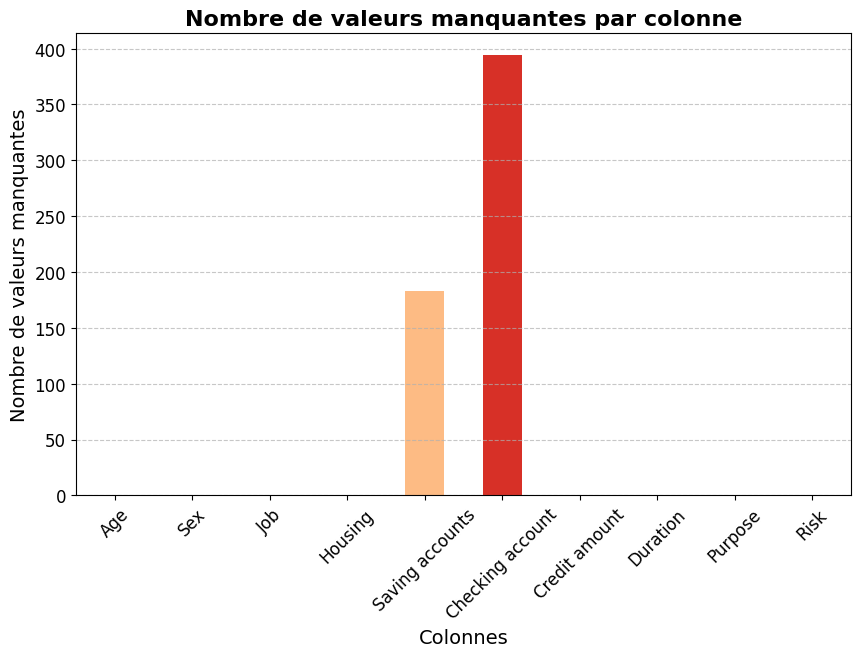

In [15]:
df.isna().sum().plot(kind='bar',color=['#FDBB84', '#D73027'],figsize=(10, 6))
plt.title('Nombre de valeurs manquantes par colonne', fontsize=16, weight='bold')
plt.xlabel('Colonnes', fontsize=14)
plt.ylabel('Nombre de valeurs manquantes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

***Visualisation des valeures manquantes dans le tableau***

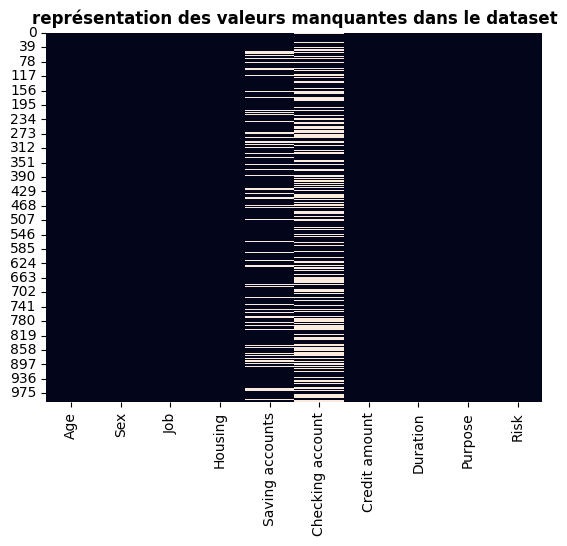

In [16]:
import seaborn as sns

sns.heatmap(df.isna(), cbar=False, color=['#FDBB84', '#D73027'])
plt.title("représentation des valeurs manquantes dans le dataset",weight='bold')
plt.show()


***Implémentation du modèle KNN IMPUTER***

In [17]:
num_columns.remove('Risk')
cat_columns.remove('Risk')


In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in cat_columns:
    label_encoders[col] = LabelEncoder()
    ligne_nonull= df[col].notnull()
    df.loc[ligne_nonull, col] = label_encoders[col].fit_transform(df.loc[ligne_nonull, col])


knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = knn_imputer.fit_transform(df)


df_knn_imputed = pd.DataFrame(df_knn_imputed, columns=df.columns)

# for col in cat_columns:
#     df_knn_imputed[col] = df_knn_imputed[col].round(0).astype(int)
#     df_knn_imputed[col] = label_encoders[col].inverse_transform(df_knn_imputed[col])

df_knn_imputed.head(20).style.background_gradient('Reds')


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.000000,1.000000,2.000000,1.000000,0.600000,0.000000,1169.000000,6.000000,5.000000,1.000000
1,22.000000,0.000000,2.000000,1.000000,0.000000,1.000000,5951.000000,48.000000,5.000000,0.000000
2,49.000000,1.000000,1.000000,1.000000,0.000000,1.200000,2096.000000,12.000000,3.000000,1.000000
3,45.000000,1.000000,2.000000,0.000000,0.000000,0.000000,7882.000000,42.000000,4.000000,1.000000
4,53.000000,1.000000,2.000000,0.000000,0.000000,0.000000,4870.000000,24.000000,1.000000,0.000000
5,35.000000,1.000000,1.000000,0.000000,0.200000,0.600000,9055.000000,36.000000,3.000000,1.000000
6,53.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2835.000000,24.000000,4.000000,1.000000
7,35.000000,1.000000,3.000000,2.000000,0.000000,1.000000,6948.000000,36.000000,1.000000,1.000000
8,61.000000,1.000000,1.000000,1.000000,3.000000,1.200000,3059.000000,12.000000,5.000000,1.000000
9,28.000000,1.000000,3.000000,1.000000,0.000000,1.000000,5234.000000,30.000000,1.000000,0.000000


In [19]:
df=df_knn_imputed

In [20]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64







.

.

# ***prétraitement de données***

***Standardisation des variables numériques***

In [21]:
# num_columns.remove("Age")

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
df.head().style.background_gradient('Reds')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,1.000000,0.146949,1.000000,0.600000,0.000000,-0.745131,-1.236478,5.000000,1.000000
1,-1.191404,0.000000,0.146949,1.000000,0.000000,1.000000,0.949817,2.248194,5.000000,0.000000
2,1.183312,1.000000,-1.383771,1.000000,0.000000,1.200000,-0.416562,-0.738668,3.000000,1.000000
3,0.831502,1.000000,0.146949,0.000000,0.000000,0.000000,1.634247,1.750384,4.000000,1.000000
4,1.535122,1.000000,0.146949,0.000000,0.000000,0.000000,0.566664,0.256953,1.000000,0.000000


In [23]:
df[num_columns].head(10).style.background_gradient('Reds')

,Age,Job,Credit amount,Duration
0,2.766456,0.146949,-0.745131,-1.236478
1,-1.191404,0.146949,0.949817,2.248194
2,1.183312,-1.383771,-0.416562,-0.738668
3,0.831502,0.146949,1.634247,1.750384
4,1.535122,0.146949,0.566664,0.256953
5,-0.048022,-1.383771,2.050009,1.252574
6,1.535122,0.146949,-0.154629,0.256953
7,-0.048022,1.677670,1.303197,1.252574
8,2.238742,-1.383771,-0.075233,-0.738668
9,-0.663689,1.677670,0.695681,0.754763


 ***Suppression des valeurs aberrantes***

In [24]:
import numpy as np


for col in num_columns:

    Q1 = np.percentile(df.loc[:, col], 25)
    Q3 = np.percentile(df.loc[:, col], 75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR

    print(f"\nProcessing feature: {i}")
    print(f"Old shape: {df.shape}")


    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"Feature '{i}' processed. Outliers removed.")

print("Outlier removal completed.")



Processing feature: Risk
Old shape: (1000, 10)
Feature 'Risk' processed. Outliers removed.

Processing feature: Risk
Old shape: (1000, 10)
Feature 'Risk' processed. Outliers removed.

Processing feature: Risk
Old shape: (630, 10)
Feature 'Risk' processed. Outliers removed.

Processing feature: Risk
Old shape: (614, 10)
Feature 'Risk' processed. Outliers removed.
Outlier removal completed.


In [25]:
df.shape

(609, 10)

# ***Implémentation des modèles du Machine Learning***

***Modèle de la REGRESSION LOGISTIQUE***

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Meilleurs paramètres : {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy score du modèle sur l'ensemble de test : 0.7705

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.75      0.26      0.39        34
         1.0       0.77      0.97      0.86        88

    accuracy                           0.77       122
   macro avg       0.76      0.62      0.62       122
weighted avg       0.77      0.77      0.73       122



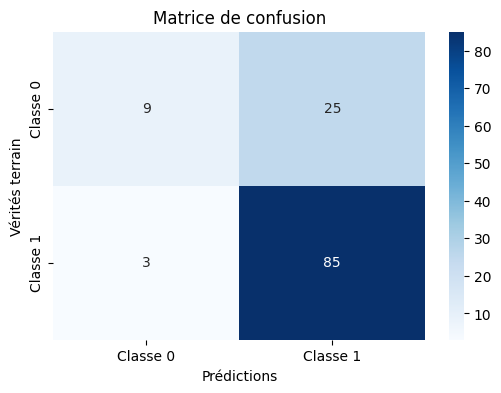

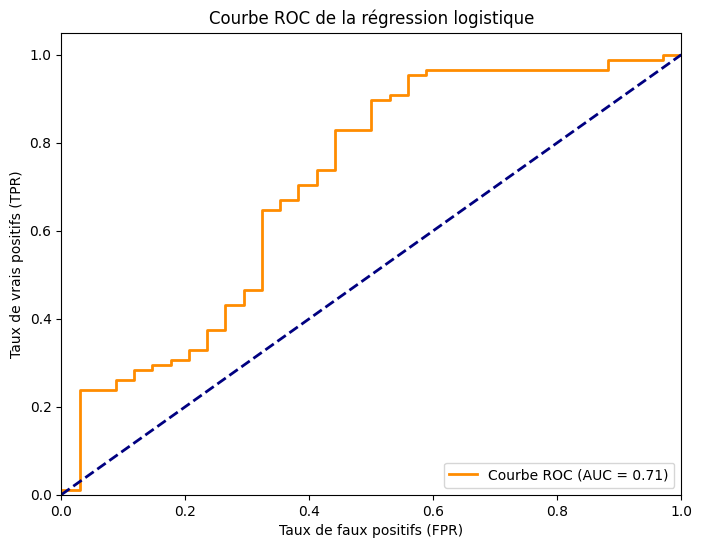

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV


X = df.drop('Risk', axis=1)
y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

param_grid = {
    'penalty': ['l2', 'l1'],  # Type de régularisation
    'C': [0.01, 0.1, 1, 10, 100],  # Valeurs de C (régularisation)
    'solver': ['liblinear', 'saga'],  # Solvers pour la régression logistique
    'max_iter': [100, 200, 300]  # Nombre d'itérations pour la convergence
}

logreg = LogisticRegression()


grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


print(f"Meilleurs paramètres : {grid_search.best_params_}")


best_logreg = grid_search.best_estimator_


y_pred = best_logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy score du modèle sur l'ensemble de test : {accuracy:.4f}")

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de confusion')
plt.show()

# Calculer les probabilités pour la courbe ROC
y_prob = best_logreg.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive (1)

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC de la régression logistique')
plt.legend(loc='lower right')
plt.show()


***Le modèle ADABOOSTCLASSIFIER***

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs paramètres pour AdaBoost : {'learning_rate': 1, 'n_estimators': 50}

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.74      0.41      0.53        34
         1.0       0.81      0.94      0.87        88

    accuracy                           0.80       122
   macro avg       0.77      0.68      0.70       122
weighted avg       0.79      0.80      0.77       122



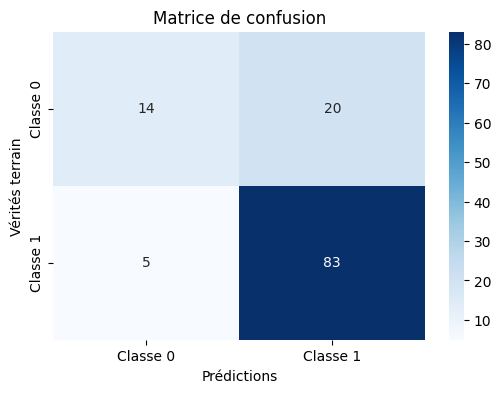

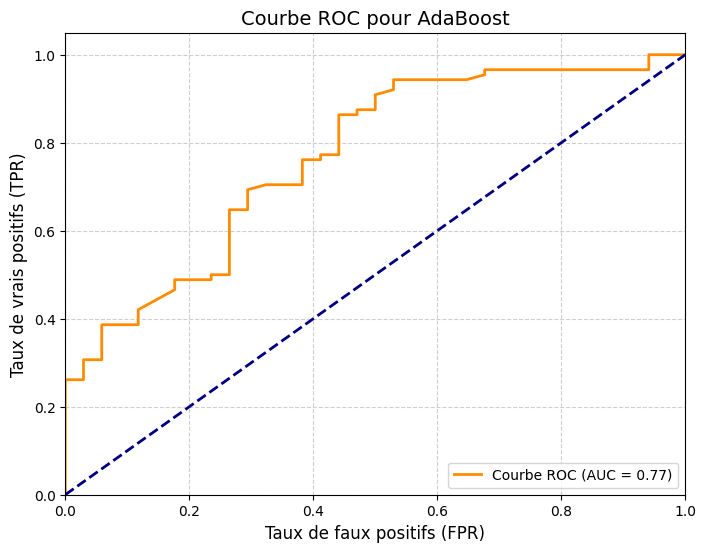

AUC : 0.7665


In [27]:
from sklearn.ensemble import AdaBoostClassifier


X = df.drop('Risk', axis=1)
y = df['Risk']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

adaboost = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres pour AdaBoost : {grid_search.best_params_}")
best_adaboost = grid_search.best_estimator_


y_pred_ad = best_adaboost.predict(X_test)





print("\nRapport de classification :")
print(classification_report(y_test, y_pred_ad))


conf_matrix = confusion_matrix(y_test, y_pred_ad)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de confusion')
plt.show()


y_prob_ad = best_adaboost.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_prob_ad)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)', fontsize=12)
plt.ylabel('Taux de vrais positifs (TPR)', fontsize=12)
plt.title('Courbe ROC pour AdaBoost', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

print(f"AUC : {roc_auc:.4f}")

***Le modèle RandomForestClassifier***

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test set (Random Forest): 0.7869

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.75      0.35      0.48        34
         1.0       0.79      0.95      0.87        88

    accuracy                           0.79       122
   macro avg       0.77      0.65      0.67       122
weighted avg       0.78      0.79      0.76       122



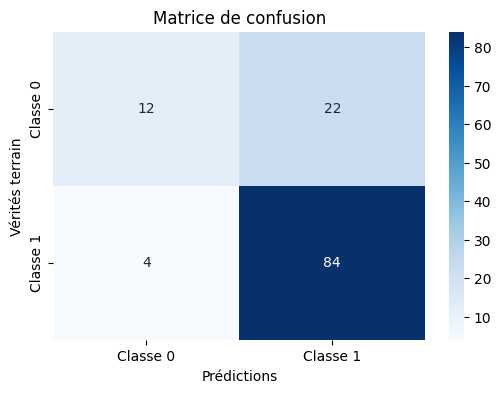

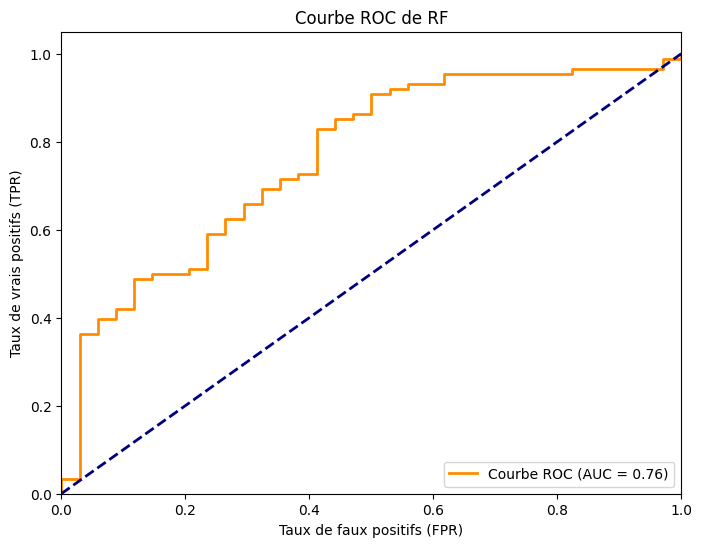

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis pour être une feuille
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on test set (Random Forest): {accuracy_rf:.4f}")



print("\nRapport de classification :")
print(classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de confusion')
plt.show()

# Calculer les probabilités pour la courbe ROC
y_prob = best_rf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive (1)

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC de RF')
plt.legend(loc='lower right')
plt.show()


***Le modèle KNEIGHNORSCLASSIFIER***

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best hyperparams: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Accuracy on test set (knn): 0.7623

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.69      0.26      0.38        34
         1.0       0.77      0.95      0.85        88

    accuracy                           0.76       122
   macro avg       0.73      0.61      0.62       122
weighted avg       0.75      0.76      0.72       122



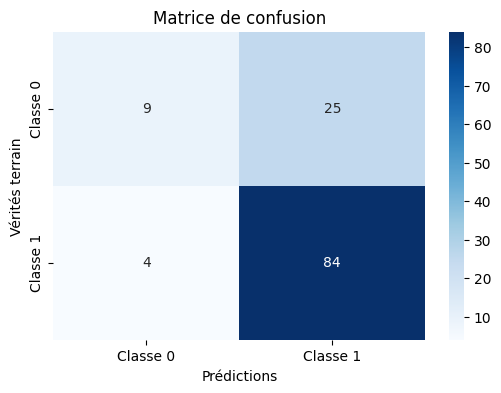

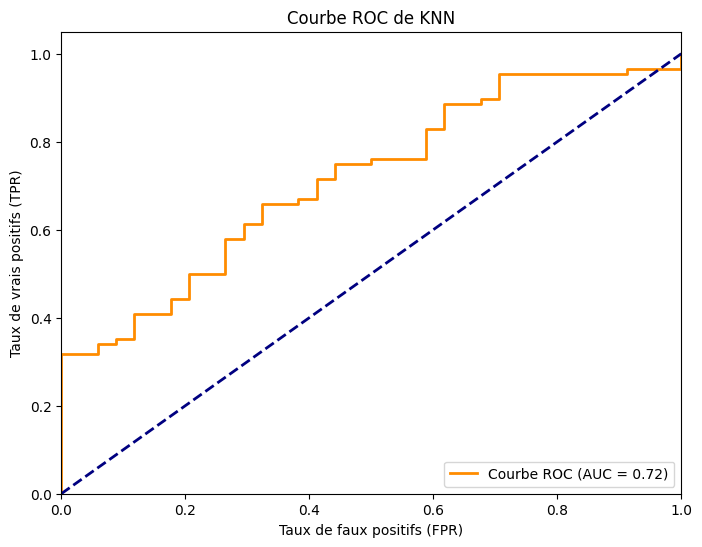

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print("Best hyperparams:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy on test set (knn): {accuracy_knn:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_knn))

conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de confusion')
plt.show()

y_prob = best_knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC de KNN')
plt.legend(loc='lower right')
plt.show()


***Le modèle VOTINGCLASSIFIER***

Précision du modèle Voting Classifier sur l'ensemble de test : 0.7787

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.77      0.29      0.43        34
         1.0       0.78      0.97      0.86        88

    accuracy                           0.78       122
   macro avg       0.77      0.63      0.64       122
weighted avg       0.78      0.78      0.74       122



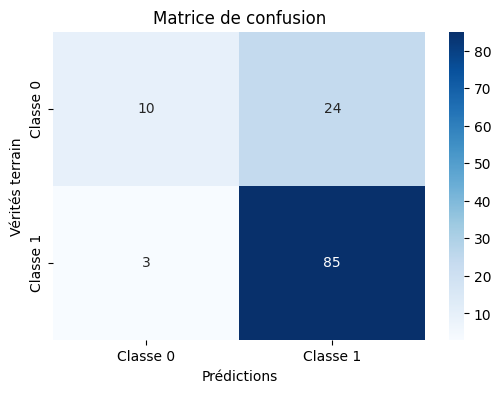

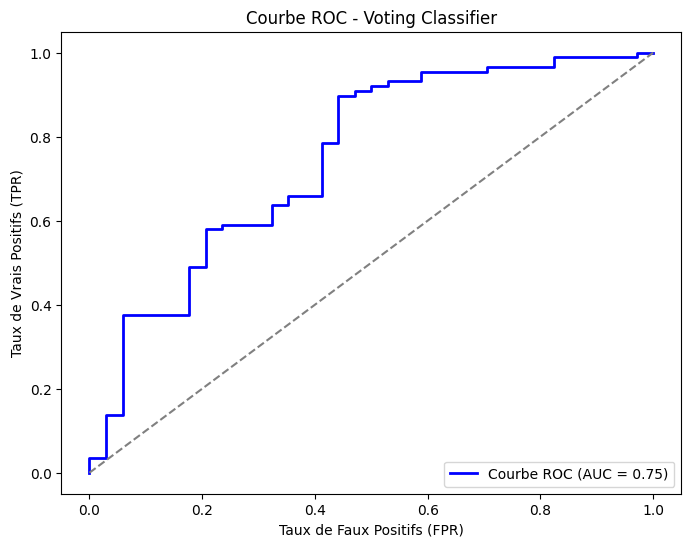

In [30]:
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression(C=1, max_iter=100, penalty='l1', solver='saga', random_state=42)
adaboost = AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('adaboost', adaboost)
], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred_vt = voting_clf.predict(X_test)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_vt)
print(f"Précision du modèle Voting Classifier sur l'ensemble de test : {accuracy:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_vt))

conf_matrix = confusion_matrix(y_test, y_pred_vt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.title('Matrice de confusion')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - Voting Classifier')
plt.legend(loc='lower right')
plt.show()
